# Problem: Bayesian A/B Testing for Conversion Rates

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
groups = ["Control", "Treatment"]
impressions = [10_000] * 2
signups = [900, 980]

In [3]:
with pm.Model(coords={"groups": groups}) as model:
    alpha = pm.Uniform("alpha", 1, 20)
    beta = pm.Uniform("beta", 1, 20)
    theta = pm.Beta("theta", alpha=alpha, beta=beta, dims="groups")

    results = pm.Binomial(
        "signups",
        n=impressions,
        p=theta,
        observed=signups,
        dims="groups",
    )

    trace = pm.sample(2000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


In [4]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.416,0.967,1.004,4.125,0.013,0.011,4466.0,3114.0,1.0
beta,14.695,3.921,7.672,19.993,0.047,0.037,6168.0,3958.0,1.0
theta[Control],0.090,0.003,0.084,0.095,0.000,0.000,6659.0,5160.0,1.0
theta[Treatment],0.098,0.003,0.093,0.104,0.000,0.000,6351.0,5011.0,1.0


In [ ]:
posterior_probs = trace.posterior["theta"].values.reshape(-1, 2)
delta = posterior_probs[:, 1] - posterior_probs[:, 0]

(delta > 0).mean().item()

0.97375

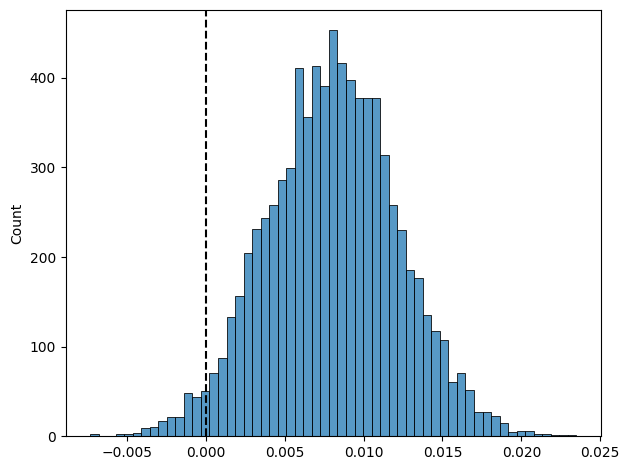

In [ ]:
sns.histplot(x=delta)
plt.axvline(0, color="black", linestyle="--")

plt.tight_layout()
plt.show()

Since the probability that $\theta_B > \theta_A$ is 97.3%, I would recommend implementing Treatment B.